# LangChain 주요 모듈 및 사용법
이 자료에서는 LangChain의 주요 모듈을 간단히 소개하고, LLM(대형 언어 모델) 호출과 관련된 기본적인 코드 사용법을 예제와 함께 설명합니다.




📘 LangChain, 어렵지 않습니다: 처음부터 쉽게 차근차근

✨ LangChain은 무엇인가요?

LangChain은 AI 언어모델을 활용한 다양한 기능을 쉽게 조립하고 확장할 수 있도록 도와주는 프레임워크입니다.
쉽게 말해, **“AI 조립 키트”**입니다.

🔧 LangChain을 왜 사용할까요?

일반적인 AI 사용	LangChain 사용

단순 질문 → 답변만	질문 → 요약 → 번역 → 저장 등 여러 단계 가능

메모리 없음	대화 기억 가능 (이전 질문 반영)

기능 하나만 가능	검색, 계산기 등 외부 도구 연결 가능

코드 복잡함	체인(chain) 방식으로 쉽게 조립

🧱 LangChain의 큰 그림: 6가지 블록으로 이해하기

LangChain을 이해하려면 이 6가지만 기억하세요:

구성 요소	하는 일	비유

1️⃣ LLM (언어모델)	AI에게 질문하고 답 받기	요리사

2️⃣ Prompt (프롬프트)	질문 틀 만들기	요리 레시피

3️⃣ Chain (체인)	여러 작업 연결하기	요리 순서 조립

4️⃣ Output Parser	결과를 정돈해서 받기	예쁘게 포장하기

5️⃣ Memory (메모리)	이전 대화 기억하기	메모장

6️⃣ Agent & Tool	외부 기능 사용하기 (검색 등)	요리 도우미

💡 예시로 쉽게 이해해볼까요?

📦 LangChain은 AI 기능을 조립하는 블록 세트입니다.

예를 들어, “AI에게 어떤 문서를 요약하고 → 영어로 번역하고 → 그 결과를 JSON 형식으로 저장”하고 싶다면?

🎯 LangChain의 핵심 철학

✅ AI를 단순히 ‘대답만 하는 모델’이 아닌,

✅ 다양한 기능을 조합할 수 있는 스마트한 파트너로 만드는 것!

🔁 LangChain이 진짜 좋은 이유는?


코드 구조가 명확해서 배우기 쉽고,

확장성이 뛰어나며,

다양한 외부 도구와 연동할 수 있어서,
단순 챗봇을 넘은 AI 서비스까지 만들 수 있습니다.


langchain은 필요한 도구들을 모아놓은 다이소와 비슷한 개념임

1.모델 I/O

2.데이터연결(RAG)

3.체인(Chain)

4.메모리

5.에이전트/툴


In [1]:
!pip install langchain_community cohere openai langchain numexpr tabulate llmdantic langchain_openai -q
!pip install --upgrade openai

# 1.모델 I/O


## 언어모델 호출

### LLM 호출 방법: LangChain의 LLM 모듈을 활용하여 OpenAI의 언어 모델을 호출할 수 있습니다. 최근 버전에서는 OpenAI와 관련된 모듈이 별도의 라이브러리로 분리되어 있습니다.

### 기본 LLM 생성 및 사용
OpenAI의 `instruct` 모델을 사용하여 LLM 객체를 생성하고 간단한 명령을 수행할 수 있습니다.

In [ ]:
# 포인트: 언어모델과 연결해서 실제 응답을 받아보는 핵심 단계입니다.

# 1. 필수 라이브러리 가져오기 및 API 키 설정
import openai  # OpenAI에서 제공하는 공식 Python 라이브러리 → 모델 호출에 필요
import os      # 운영체제와 관련된 기능을 제공 (환경변수 설정 등)

# 2. API 키 설정
# 포인트: 보안상 중요한 정보이므로, 직접 노출하지 않고 환경변수로 설정합니다.
# API 키는 OpenAI 계정에서 발급받은 인증 토큰입니다. 이 키를 통해 내 계정으로 모델을 사용할 수 있습니다.
# os.environ['OPENAI_API_KEY'] 
# 3. OpenAI 클라이언트 객체 생성
# 포인트: 이 client 객체를 통해 모델 호출 등 다양한 기능을 사용할 수 있습니다.
client = openai.OpenAI()
print("API 키 설정이 완료되었습니다.")  # 키 설정이 완료되었음을 출력

API 키 설정이 완료되었습니다.


In [3]:
# 4. LangChain 라이브러리에서 OpenAI 모듈 가져오기
# LangChain은 OpenAI 모델을 포함한 여러 언어모델을 쉽게 연결하고 사용할 수 있게 도와주는 프레임워크입니다.
from langchain_openai import OpenAI

# 5. LLM(언어 모델) 객체 생성
# model: 사용할 모델 지정 → gpt-3.5-turbo-instruct는 '명령어 기반' 응답에 적합
# temperature: 창의성 설정 (0.5면 중간 수준의 창의성)
# max_tokens: 응답의 최대 길이 (토큰 기준)
llm = OpenAI(model='gpt-3.5-turbo-instruct', temperature=0.5, max_tokens=500)

In [4]:
# 6. LLM 모델에 명령어 전달 및 응답 받기
# invoke(): 입력된 문장을 모델에게 전달하고, 그 결과(답변)를 받아오는 메서드
# 예: '한국에서 유명한 장소 하나를 알려주세요.' → 모델이 그에 대한 답변 생성
response = llm.invoke("한국에서 유명한 장소하나를 알려주세요.")

# 7. 결과 출력
print(response)  # 콘솔에 모델이 생성한 응답을 출력

# 포인트: invoke는 Chat 모델을 사용할 때 사용자 역할(user)을 명시하지 않아도 자동으로 처리됩니다.
# 자연스러운 대화처럼 질문만 넣으면 AI가 적절한 답변을 생성합니다.


한국에서 유명한 장소 중 하나는 경복궁입니다. 경복궁은 조선 왕조의 궁궐로서, 서울의 중심지인 종로구에 위치하고 있으며, 우리나라의 대표적인 궁궐 중 하나로 국보 1호로 지정되어 있습니다. 매년 많은 관광객들이 찾는 곳으로, 아름다운 조선 시대의 건축물과 정원을 감상할 수 있으며, 궁궐 내부에는 국립민속박물관과 궁중문화전당 등 다양한 문화 시설들이 있어서 한국의 전통문화를 체험할 수 있습니다. 또한, 매일 오후에는 궁궐 내부에서 왕궁 수호병의 교대식이 진행되는 등 다양한 이벤트와 체험 프로그램도 제공되어 관광객들에게 인기를 끌고 있습니다. 


### Chat LLM 사용 방법

대화형 LLM을 사용하기 위해 ChatOpenAI 클래스를 사용할 수 있습니다. 이 예제에서는 gpt-4o 모델을 사용합니다.

In [5]:
from langchain_openai import ChatOpenAI  # LangChain 라이브러리에서 ChatOpenAI 가져오기
# Chat LLM(언어 모델) 객체 생성
chat_llm = ChatOpenAI(model='gpt-4o', temperature=0.5, max_tokens=1024)
# 사용자 질문에 대한 응답 요청
question = "한국에서 가장 인기있는 장소의 그 장소에 대해 설명해 주세요."
# invoke 메서드로 질문에 대한 답변 생성
response = chat_llm.invoke(question)
# 생성된 답변 출력
print(response)

content='한국에서 가장 인기 있는 장소 중 하나는 서울의 경복궁입니다. 경복궁은 조선 왕조의 법궁으로, 1395년에 건립되었습니다. 이 궁궐은 한국 전통 건축의 아름다움을 잘 보여주며, 역사적으로도 중요한 의미를 지니고 있습니다.\n\n경복궁은 광화문, 근정전, 경회루 등 여러 아름다운 건축물로 구성되어 있습니다. 특히 근정전은 국왕이 정무를 보던 중심 건물로, 그 웅장한 규모와 섬세한 장식이 인상적입니다. 경회루는 연못 위에 세워진 누각으로, 예전에는 연회나 중요한 회의를 열던 장소였습니다.\n\n또한, 경복궁은 사계절마다 다른 매력을 선사합니다. 봄에는 벚꽃과 함께 아름다운 풍경을 즐길 수 있고, 가을에는 단풍이 궁궐을 물들입니다. 이러한 이유로 경복궁은 많은 관광객과 현지인들이 찾는 명소입니다. 또한, 경복궁에서는 전통 의상인 한복을 입고 궁궐을 둘러보는 체험도 할 수 있어, 한국의 전통 문화를 직접 경험할 수 있는 기회를 제공합니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 280, 'prompt_tokens': 22, 'total_tokens': 302, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BZo0cMmVTtzMtr8GaZNYC888IsT2W', 'service_tier': 'default', 'finish_reason': 'stop',

In [6]:
print(response.content)

한국에서 가장 인기 있는 장소 중 하나는 서울의 경복궁입니다. 경복궁은 조선 왕조의 법궁으로, 1395년에 건립되었습니다. 이 궁궐은 한국 전통 건축의 아름다움을 잘 보여주며, 역사적으로도 중요한 의미를 지니고 있습니다.

경복궁은 광화문, 근정전, 경회루 등 여러 아름다운 건축물로 구성되어 있습니다. 특히 근정전은 국왕이 정무를 보던 중심 건물로, 그 웅장한 규모와 섬세한 장식이 인상적입니다. 경회루는 연못 위에 세워진 누각으로, 예전에는 연회나 중요한 회의를 열던 장소였습니다.

또한, 경복궁은 사계절마다 다른 매력을 선사합니다. 봄에는 벚꽃과 함께 아름다운 풍경을 즐길 수 있고, 가을에는 단풍이 궁궐을 물들입니다. 이러한 이유로 경복궁은 많은 관광객과 현지인들이 찾는 명소입니다. 또한, 경복궁에서는 전통 의상인 한복을 입고 궁궐을 둘러보는 체험도 할 수 있어, 한국의 전통 문화를 직접 경험할 수 있는 기회를 제공합니다.


## 1.2프롬프트 템플릿(Prompt Template)

LLM(대형 언어 모델) 어플리케이션에서 프롬프트는 사용자의 입력을 적절하게 변형하여 모델에 전달됩니다. 이를 위해 LangChain 라이브러리의 `PromptTemplate`과 `ChatPromptTemplate`을 사용할 수 있습니다. 이 코드에서는 이러한 템플릿을 이용해 간단한 프롬프트를 생성하는 방법을 설명합니다.


### 1.2.1 기본적인 프롬프트 템플릿 생성

 사용자가 제공한 입력을 바탕으로 간단한 프롬프트를 생성

In [7]:
# 필요한 라이브러리 임포트
from langchain.prompts import PromptTemplate  # 프롬프트 템플릿 생성을 위한 기본 라이브러리
from langchain.prompts import ChatPromptTemplate  # 챗봇용 프롬프트 템플릿 생성을 위한 라이브러리


In [8]:

# 초등학생에게 용어를 쉽게 설명하는 챗봇 템플릿 문자열을 정의
simple_explain_template = "당신은 초등학생에게 {term}을(를) 쉽게 설명하는 챗봇입니다."
print(simple_explain_template)  # 템플릿이 제대로 작성되었는지 출력해 확인

# 기본 파이썬에서 제공하는 .format() 함수로 템플릿을 활용하는 방법
# 'term'이라는 자리 표시자에 '인공지능'이라는 값을 넣어 템플릿을 포맷
formatted_template = simple_explain_template.format(term='인공지능')
print(formatted_template)  # 포맷된 템플릿을 출력해 확인


당신은 초등학생에게 {term}을(를) 쉽게 설명하는 챗봇입니다.
당신은 초등학생에게 인공지능을(를) 쉽게 설명하는 챗봇입니다.


In [9]:
# LangChain의 PromptTemplate을 사용하여 프롬프트를 생성
# input_variables: 템플릿에서 사용할 변수를 정의 (여기서는 'term'을 사용)
# template: 미리 정의한 챗봇 설명 템플릿을 연결
explain_prompt = PromptTemplate(input_variables=["term"],
                                template=simple_explain_template)
# PromptTemplate을 이용해 'term' 변수에 '인공지능'을 넣어 템플릿을 포맷
formatted_prompt = explain_prompt.format(term="인공지능")
# LLM 모델을 호출해 포맷된 템플릿을 바탕으로 응답 생성 (실제 예시)
response = llm.invoke(formatted_prompt)  # LLM을 이용해 응답을 생성하는 부분
print(response)  # 생성된 응답을 출력




안녕하세요! 저는 초등학생에게 인공지능을 쉽게 설명하는 챗봇입니다. 인공지능이란 무엇일까요? 인공지능은 사람처럼 생각하고 학습할 수 있는 컴퓨터 시스템을 말해요. 이 컴퓨터 시스템은 우리가 일상 생활에서 사용하는 스마트폰, 컴퓨터, 로봇 등에서도 사용되고 있어요. 인공지능은 우리가 입력한 정보를 분석하고 학습하여 우리가 원하는 답변이나 결과를 제공해줄 수 있어요. 예를 들어, 우리가 스마트폰에 음성으로 "음악을 틀어줘"라고 말하면, 인공지능이 음악 앱을 실행시켜줄 수 있어요! 이렇게 인공지능은 우리의 생활을 더 편리하고 즐겁게 만들어줄 수 있답니다. 이렇게 쉽게 설명해볼 수 있었나요? 더 궁금한 점이 있으면 언제든지 물어보세요!


In [10]:
# 추가 예시: PromptTemplate을 이용해 제품명을 넣어 프롬프트 생성
from langchain import PromptTemplate

# 특정 템플릿 문자열을 사용하여 PromptTemplate 인스턴스 생성
# 'product'라는 자리 표시자가 포함된 템플릿 문자열 정의
prompt = PromptTemplate(
    template="{product}는 어느 회사에서 개발한 제품인가요？",
    input_variables=["product"]  # 템플릿에서 사용할 변수 'product'를 정의
)

# 'prompt' 객체를 사용해 다양한 제품명으로 템플릿을 포맷한 후 결과를 출력
print(prompt.format(product="아반떼"))  # '아반떼'로 템플릿 포맷 후 출력
print(prompt.format(product="소나타"))  # '소나타'로 템플릿 포맷 후 출력
print(prompt.format(product="벤츠"))  # '벤츠'로 템플릿 포맷 후 출력


아반떼는 어느 회사에서 개발한 제품인가요？
소나타는 어느 회사에서 개발한 제품인가요？
벤츠는 어느 회사에서 개발한 제품인가요？


### 1.2.2. 두 개의 매개변수를 사용하는 프롬프트 생성

여러 매개변수를 받는 프롬프트: 특정 주제에 대해 원하는 언어로 설명하는 프롬프트를 생성


In [11]:
# 번역을 위한 프롬프트 템플릿
translate_template = "{topic}에 대해 {language}로 설명해 주세요."

# ✨ 포인트 설명:
# 프롬프트 템플릿이란?
# 👉 프롬프트는 AI에게 질문할 "문장 틀"을 미리 만들어두는 것입니다.
# 위의 템플릿은 사용자가 '주제(topic)'와 '언어(language)'를 넣으면,
# 그걸 바탕으로 "무엇에 대해, 어떤 언어로 설명해 달라"는 문장을 자동으로 만들어줍니다.
# 예: topic='컴퓨터 비전', language='한국어' → "컴퓨터 비전에 대해 한국어로 설명해 주세요."

# PromptTemplate으로 템플릿 생성
translate_prompt = PromptTemplate(input_variables=["topic", "language"],
                                  template=translate_template)

# ✨ 포인트 설명:
# PromptTemplate 클래스는 LangChain에서 제공하는 기능으로,
# 위에서 만든 템플릿 문자열을 바탕으로 실제로 사용할 "프롬프트 객체"를 만들어줍니다.
# - input_variables: 템플릿 안에 채워 넣을 변수 이름들을 리스트로 명시합니다.
# 즉, 사용자는 topic과 language 두 가지 값을 넣어야 합니다.

# 프롬프트 생성 및 실행 예시
formatted_translate_prompt = translate_prompt.format(topic='컴퓨터 비전', language='한국어')

# ✨ 포인트 설명:
# .format() 메서드를 통해 실제 값을 템플릿에 집어넣습니다.
# 여기서는 topic='컴퓨터 비전', language='한국어'를 넣은 결과
# 최종 프롬프트는 이렇게 됩니다 → "컴퓨터 비전에 대해 한국어로 설명해 주세요."

response_translate = llm.invoke(formatted_translate_prompt)

# ✨ 포인트 설명:
# llm.invoke()는 AI 모델(GPT 등)에게 프롬프트를 전달해 답변을 요청하는 함수입니다.
# 즉, 앞에서 만든 문장을 AI에게 그대로 물어보고, 그에 대한 답변을 받아오는 단계입니다.

# 💡 요약 흐름 예시:
# 1. 틀 만들기: "{topic}에 대해 {language}로 설명해 주세요."
# 2. 값 넣기: topic="컴퓨터 비전", language="한국어"
# 3. 완성된 질문: "컴퓨터 비전에 대해 한국어로 설명해 주세요."
# 4. AI에게 전달 → 답변 받아오기 (예: "컴퓨터 비전은 ... 입니다.")


In [47]:
print(response_translate)



컴퓨터 비전은 컴퓨터가 인간의 시각 능력을 모방하여 디지털 이미지나 비디오를 처리하고 이해하는 분야입니다. 이를 위해 컴퓨터 비전은 이미지나 비디오에서 모양, 색상, 패턴 등의 특징을 추출하고 이를 분석하여 객체를 인식하고 분류하는 기술을 사용합니다. 또한, 컴퓨터 비전은 이미지나 비디오에서 원하는 정보를 추출하고 이를 활용하여 다양한 응용 분야에서 사용될 수 있습니다. 예를 들어, 자율주행차의 경우 컴퓨터 비전 기술을 사용하여 주변 환경을 인식하고 이를 바탕으로 운전을 제어합니다. 또한, 의료 분야에서는 컴퓨터 비전을 사용하여 X-ray나 MRI 이미지를 분석하여 질병을 진단하거나 암 조직을 탐지하는 등의 의료 영상 분석에 활용될 수 있습니다. 컴퓨터 비전은 인간의 시각 능력을 대신하여 다양한 분야에서 활용되고 있으며, 더 나은 인공지능 기술을 발전시키는 데에도 중요한 역할을 합니다.


In [62]:
translate_template = "한국의 {topic}에 대한 {language}명의 선수를 말해줘! 쉼표로 구분된 목록을 만들어줘"
formatted_translate_prompt = translate_prompt.format(topic='축구선수', language='3')
response_translate = llm.invoke(formatted_translate_prompt)
print(response_translate)

content='축구선수는 축구라는 스포츠에서 경기를 하는 선수로, 팀의 일원으로서 공격, 수비, 미드필더 등 다양한 포지션에서 활약합니다. 이들은 뛰어난 체력과 기술, 전술 이해도를 바탕으로 경기를 진행하며, 팀의 승리를 위해 협력합니다. 또한, 축구선수는 종종 팬들에게 영감을 주고, 사회적 영향력을 행사하는 역할도 수행합니다.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 20, 'total_tokens': 118, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_54eb4bd693', 'finish_reason': 'stop', 'logprobs': None} id='run--d15702ad-ee7a-4c55-8c64-50cc6c5cf65f-0'


In [13]:
from langchain_core.prompts import PromptTemplate

# 템플릿 정의: {name}과 {subject}라는 변수를 포함
template_text = "안녕하세요, 저는 {name}입니다. 제가 선호하는 과목은 {subject}입니다."

# PromptTemplate 인스턴스 생성
prompt_template = PromptTemplate.from_template(template_text)

# 템플릿에 값을 채워서 완성된 프롬프트 생성
filled_prompt = prompt_template.format(name="김철수", subject="수학")

# 완성된 프롬프트 출력
print(filled_prompt)

안녕하세요, 저는 김철수입니다. 제가 선호하는 과목은 수학입니다.


### 1.2.3. 채팅 메시지를 위한 ChatPromptTemplate 생성

채팅 대화의 흐름을 설정하여 프롬프트를 생성합니다. 시스템 메시지와 사용자 메시지를 순차적으로 연결해 자연스러운 대화를 유도



In [14]:
# ChatPromptTemplate을 이용해 채팅 대화 흐름 정의
chat_prompt = ChatPromptTemplate.from_messages([
    ("system", '당신은 모든 질문에 대해 긍정적인 답변을 하는 챗봇입니다.'),  # 시스템 메시지: 챗봇의 역할과 성격을 정의
    ("user", 'LangChain을 배우면 어떤 유용한 점이 있나요?')  # 사용자 메시지: 질문 내용
])

# 메시지를 포맷팅하여 LLM에 전달
formatted_chat_messages = chat_prompt.format_messages()  # 대화 내용을 LLM이 이해할 수 있는 형식으로 정리
response_chat = llm.invoke(formatted_chat_messages)  # 정리된 메시지를 LLM에 전달하여 응답 생성
print(response_chat)  # 응답 출력



System: LangChain은 다양한 언어를 배우는 데 도움이 될 뿐만 아니라, 문장의 구조와 문법을 이해하는 데도 도움이 됩니다. 또한 다양한 문화와 관련된 지식도 습득할 수 있어서 넓은 시야를 갖게 될 수 있습니다.


In [54]:
from langchain_core.prompts import ChatPromptTemplate

# 1. 템플릿 메시지 정의: system과 user 메시지에 변수 포함
chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 친절한 조언을 해주는 교사입니다."),
    ("user", "안녕하세요, 저는 {name}입니다. 제가 선호하는 과목은 {subject}입니다. 저에게 어떤 조언을 해주실 수 있나요?")
])

# 2. 변수값 채워넣기
filled_messages = chat_prompt.format_messages(
    name="이짜이밍",
    subject="경제"
)

# 3. 메시지를 LLM에 전달 (예: ChatOpenAI 등)
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI()
response = llm.invoke(filled_messages)

# 4. 결과 출력
print(response.content)


안녕하세요, 이짜이밍님. 경제에 관심이 있으시다니 멋진 일이네요! 경제는 매우 중요한 분야이며 다양한 직업 기회를 제공해줍니다. 이와 관련하여 몇 가지 조언을 드릴게요.

1. 교육: 경제 분야에서 경쟁력을 갖추기 위해서는 적합한 교육이 필요합니다. 대학이나 전문 학교에서 경제학 전공을 선택하거나 관련 분야의 석사 또는 박사 학위를 취득하는 것이 도움이 될 수 있습니다.

2. 경제 이해: 경제에 대한 기본 지식을 탄탄히 쌓는 것이 중요합니다. 경제 이론과 실무 지식을 꾸준히 학습하고 최신 경제 동향을 파악하는 습관을 가지세요.

3. 경제 관련 경험: 경제 분야에서의 경험이 중요합니다. 경제 연구원, 금융 기관, 정부 기관 등에서 인턴십이나 경제 관련 일자리를 통해 실무 경험을 쌓는 것이 도움이 될 수 있습니다.

4. 네트워킹: 경제 분야에서 성공을 거두기 위해서는 좋은 인맥이 중요합니다. 세미나나 컨퍼런스에 참석하거나 경제학자들과 소통할 수 있는 기회를 찾아 인적 네트워크를 구축하세요.

많은 노력과 열정이 필요하지만, 경제 분야에서 성공을 거두기 위해 꾸준한 노력을 기울이시면 좋은 결과를 얻을 수 있을 것입니다. 행운을 빕니다!


## 출력형식(Output Parser)

In [57]:
import langchain
langchain.chat_model.

TypeError: 'module' object is not callable

In [61]:
# 🧠 포인트: LangChain을 이용해 LLM에게 질문하고, 그 결과를 '쉼표로 구분된 리스트' 형태로 받아오는 구조입니다.

# ✅ 필요한 모듈 불러오기: LLM 모델, 프롬프트 템플릿, 출력 형식 파서를 가져옵니다.
from langchain.output_parsers import CommaSeparatedListOutputParser  # → 결과를 쉼표(,)로 구분된 리스트로 변환해주는 파서
from langchain.prompts import PromptTemplate  # → 프롬프트를 템플릿 형식으로 구조화할 수 있게 도와주는 도구
from langchain.chat_models import ChatOpenAI  # → OpenAI의 챗 기반 모델을 LangChain에서 사용할 수 있게 해주는 모듈

# ✅ LLM(언어모델) 객체 초기화: GPT-4 모델을 사용해서 답변을 생성합니다.
llm = ChatOpenAI(
    temperature=0,         # 🎯 포인트: temperature는 창의성(무작위성)의 정도 → 0이면 가장 정적인/일관된 답변 생성
    max_tokens=2048,       # 응답의 최대 길이를 설정 (토큰 기준)
    model_name='gpt-4o-mini',    # 사용할 LLM 모델 이름 지정
)

# ✅ 출력 형식 설정: 쉼표로 구분된 문자열로 응답을 받고자 할 때 사용하는 파서
output_parser = CommaSeparatedListOutputParser()  # → 예: "손흥민, 황희찬, 김민재"
format_instructions = output_parser.get_format_instructions()
# → LLM에게 "답변은 쉼표로 구분된 리스트 형식으로 해줘" 라고 알려주는 역할

# ✅ 프롬프트 템플릿 정의: 질문 문장을 만드는 틀을 미리 정의해둡니다.
prompt = PromptTemplate(
    # 🔧 template: 프롬프트 형식 문자열 정의
    # {subject} → 유동적으로 바뀌는 질문 주제 (예: "한국의 축구선수")
    # {format_instructions} → 출력 형식 가이드라인 삽입 (위에서 가져온 쉼표 지침)
    template="{subject}에 대한 3명의 선수를 말해줘!.\n{format_instructions}",

    # 📌 input_variables: 위 템플릿에서 어떤 변수들을 사용자 입력으로 받을 건지 정의
    input_variables=["subject"],

    # 📌 partial_variables: 고정적으로 넣어줄 값 (여기선 format_instructions를 항상 넣어줌)
    partial_variables={"format_instructions": format_instructions}
)

# ✅ 실제 사용할 질문 내용 정의
query = "한국의 정치인"
# → 예: 템플릿에서 {subject} 자리에 들어가게 됨

# ✅ 프롬프트를 모델에게 전달하여 응답 생성
# prompt.format(subject=query) → "한국의 축구선수에 대한 3명의 선수를 말해줘! 쉼표로 구분된 목록을 만들어줘."
# 📌 LLM이 이해할 수 있는 형태의 문장으로 변환한 뒤, 모델에 전달
output = llm.predict(text=prompt.format(subject=query))

# ✅ 모델의 응답을 파서를 이용해 파싱 (즉, 쉼표 기준으로 쪼개서 리스트로 변환)
parsed_result = output_parser.parse(output)

# ✅ 최종 결과 출력
# 예: ['손흥민', '황희찬', '김민재']
print(parsed_result)


['이재명', '윤석열', '박지현']


In [71]:
# ✅ 필요한 모듈 불러오기: LangChain에서 제공하는 주요 기능들을 사용하기 위한 준비입니다.
from langchain_core.output_parsers import JsonOutputParser  # → 모델의 응답을 JSON 형식으로 변환해주는 파서
from langchain.prompts import PromptTemplate               # → 프롬프트(질문)을 템플릿 형식으로 구성하는 도구
from langchain.chat_models import ChatOpenAI               # → OpenAI의 챗 모델(GPT 시리즈)을 사용하는 클래스
# ✅ 1단계: 언어모델(LLM) 초기화
llm = ChatOpenAI(
    temperature=0,        # 🎯 포인트: temperature는 '창의성'을 조절 → 0이면 가장 일관되고 안정적인 응답 생성
    max_tokens=2048,      # → 모델이 생성할 수 있는 응답의 최대 길이(토큰 수 기준)
    model_name='gpt-4o-mini',   # → 사용할 LLM 모델 이름 설정 (여기선 GPT-4 사용)
)

# ✅ 2단계: 출력 형식 지정 - JSON 형식으로 결과를 받기 위한 파서 초기화
output_parser = JsonOutputParser()  # → 모델이 생성한 텍스트를 JSON 구조로 파싱해줌 (예: {"선수": ["손흥민", "황희찬", "김민재"]})

# → 모델에게 "답변은 JSON 형태로 해줘"라고 알려주는 설명 텍스트를 가져옴
format_instructions = output_parser.get_format_instructions()
# 예: "응답은 다음 JSON 형식으로 작성하세요: {"선수": [항목1, 항목2, 항목3]}"

# ✅ 3단계: 프롬프트 템플릿 구성
prompt = PromptTemplate(
    # 템플릿 본문: 질문 문장과 출력 형식 안내를 포함
    # {subject} → 사용자 입력으로 바뀌는 질문 내용
    # {format_instructions} → 출력 형식 지시문 (항상 JSON 형태로 응답하라고 명시)
    template="5명의 선수를 말해줘!{subject}.\n{format_instructions}",

    # 입력 변수 정의 → 템플릿에서 바뀌는 부분 지정
    input_variables=["subject"],

    # 고정 변수 정의 → format_instructions는 항상 고정되어 들어감
    partial_variables={"format_instructions": format_instructions}
)

# ✅ 4단계: 실제 사용할 질문 정의
query = "한국의 야구선수는?"
# → {subject} 자리에 들어갈 사용자 입력

# ✅ 5단계: 완성된 프롬프트를 모델에 전달하여 응답 생성
output = llm.predict(text=prompt.format(subject=query))
# 예: "3명의 선수를 말해줘! 한국의 축구선수는?.\n응답은 JSON 형식으로 작성하세요: {"선수": [...]}"

# ✅ 6단계: 모델이 출력한 결과를 파서로 변환 (→ JSON 형식의 딕셔너리 형태로 가공)
parsed_result = output_parser.parse(output)
# 예: {"선수": ["손흥민", "황희찬", "김민재"]}

# ✅ 7단계: 최종 결과 출력
print(parsed_result)


{'Korean_Baseball_Players': [{'name': '이종범', 'position': '외야수', 'team': 'KIA 타이거즈'}, {'name': '박찬호', 'position': '투수', 'team': '한화 이글스'}, {'name': '김광현', 'position': '투수', 'team': 'SSG 랜더스'}, {'name': '최정', 'position': '내야수', 'team': 'SSG 랜더스'}, {'name': '이대호', 'position': '내야수', 'team': '롯데 자이언츠'}]}


In [66]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI

# [포인트] LLM(Language Model) 객체 초기화
# → 우리가 사용할 GPT-4 모델을 불러오는 부분입니다.
llm = ChatOpenAI(
    temperature=0,        # [포인트] 창의성(무작위성) 설정: 0은 가장 논리적이고 일관된 응답을 의미합니다.
    max_tokens=2048,      # 생성할 응답의 최대 길이를 설정 (문장의 분량을 제한하는 역할)
    model_name='gpt-4',   # 사용할 오픈AI의 모델 이름 지정 (gpt-3.5도 사용 가능)
)

# [포인트] 출력 파서(Output Parser) 정의
# → 모델의 출력을 '쉼표로 구분된 리스트' 형식으로 정리해주는 도구입니다.
output_parser = CommaSeparatedListOutputParser()

# [포인트] 파서가 요구하는 출력 형식 정보 가져오기
# → 이걸 프롬프트에 포함시켜야 모델이 우리가 원하는 형태로 출력해줍니다.
format_instructions = output_parser.get_format_instructions()

# [포인트] 프롬프트 템플릿 정의 (PromptTemplate)
# → 사용자 질문(subject)을 받아서 "7개의 팀을 보여줘"라는 요청 문장을 만들고,
#    거기에 format_instructions를 자동으로 붙여주는 구조입니다.
prompt = PromptTemplate(
    template="7개의 팀을 보여줘 {subject}.\n{format_instructions}",  # 출력 형식까지 포함된 요청 문장 구성
    input_variables=["subject"],                                     # 유동적으로 바뀔 입력 값: subject
    partial_variables={"format_instructions": format_instructions}   # 고정적으로 항상 들어갈 값: 출력 형식 안내
)

In [68]:
# [포인트] 실제 입력으로 사용할 질문 (사용자 입력 시뮬레이션)
query = "한국의 축구팀은?"

# [포인트] 프롬프트를 완성하고 모델에 전달하여 응답 생성
# → 프롬프트는 "7개의 팀을 보여줘 한국의 야구팀은?" + 출력형식 안내 문장으로 구성됩니다.
output = llm.predict(text=prompt.format(subject=query))

# [포인트] 모델의 응답을 파싱(parse)하여 리스트 형태로 정제
# → 모델은 문자열을 반환하기 때문에, 그걸 우리가 다루기 쉬운 Python 리스트로 변환합니다.
parsed_result = output_parser.parse(output)

# 최종 결과 출력
# → ['팀1', '팀2', ..., '팀7'] 이런 형태의 리스트가 출력됩니다.
print(parsed_result)

['FC 서울', '전북 현대 모터스', '수원 삼성 블루윙즈', '울산 현대', '포항 스틸러스', '성남 FC', '인천 유나이티드']


In [70]:
# [포인트] GPT-4 모델을 사용할 수 있게 해주는 LangChain의 클래스
# → ChatOpenAI는 OpenAI의 GPT 모델과 쉽게 연결해서 쓸 수 있도록 도와줍니다.
from langchain.chat_models import ChatOpenAI

# [포인트] 프롬프트 템플릿 생성 도구
# → 질문을 구성할 때 변수(예: 사용자 입력)를 포함한 '문장 템플릿'을 만들 수 있습니다.
from langchain.prompts import PromptTemplate

# [포인트] 모델이 출력한 결과를 JSON 형식으로 정리해주는 파서
# → 예: {"teams": ["팀1", "팀2", ..., "팀7"]}처럼 구조화된 형태로 결과를 받고 싶을 때 사용합니다.
from langchain_core.output_parsers import JsonOutputParser


# [1단계] GPT-4 모델 객체 생성
# → 모델 이름만 지정하면 자동으로 연결됩니다.
llm = ChatOpenAI(model_name='gpt-4')


# [2단계] JSON 형식 출력을 위한 파서 설정
# → 모델이 응답을 '사람이 읽기 좋은 문장'이 아닌 '기계가 읽기 좋은 구조(딕셔너리)'로 만들어줍니다.
output_parser = JsonOutputParser()

# [포인트] 파서에게 필요한 출력 형식 설명문을 가져옵니다.
# → 이 설명을 GPT에 포함시켜야 모델이 우리가 원하는 JSON 형태로 정확히 응답해줍니다.
format_instructions = output_parser.get_format_instructions()


# [3단계] 프롬프트(질문) 템플릿 정의
# → 사용자가 입력한 주제(subject)에 따라 문장을 만들고, 출력 형식 안내도 같이 넣습니다.
prompt = PromptTemplate(
    template="7개의 팀을 보여줘 {subject}.\n{format_instructions}",
    input_variables=["subject"],  # 사용자가 입력할 변수 (여기선 "한국의 야구팀은?")
    partial_variables={"format_instructions": format_instructions}  # 고정값: 출력형식 지시문
)

# [4단계] 실제로 사용자 질문을 입력
# → 이 값은 템플릿의 {subject} 자리에 들어가며, 실제 모델 입력이 됩니다.
query = "한국의 축구팀은?"

# [5단계] 최종 프롬프트 문장을 완성하고 모델에 전달
# → 완성된 문장은 예를 들어:
#   "7개의 팀을 보여줘 한국의 야구팀은? \n {여기에 JSON 형식 안내가 포함됨}"
output = llm.predict(text=prompt.format(subject=query))

# [6단계] 모델의 응답 출력
# → 현재는 출력만 하고 있지만, 이후 이 값을 구조화해서 파싱(parse)할 수 있습니다.
print(output)


{
  "teams": [
    {
      "name": "FC Seoul",
      "location": "Seoul"
    },
    {
      "name": "Suwon Samsung Bluewings",
      "location": "Suwon"
    },
    {
      "name": "Jeonbuk Hyundai Motors",
      "location": "Jeonju"
    },
    {
      "name": "Pohang Steelers",
      "location": "Pohang"
    },
    {
      "name": "Ulsan Hyundai",
      "location": "Ulsan"
    },
    {
      "name": "Incheon United",
      "location": "Incheon"
    },
    {
      "name": "Seongnam FC",
      "location": "Seongnam"
    }
  ]
}


In [80]:
# 추가적으로 내가 궁금했던 사항들..

llm = ChatOpenAI(model_name='gpt-4o')
output_parser = JsonOutputParser()
format_instructions = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="5가지로 정리해주고, 한국어로 출력해줘 {subject}.\n{format_instructions}",
    input_variables=["subject"],  # 사용자가 입력할 변수 (여기선 "한국의 야구팀은?")
    partial_variables={"format_instructions": format_instructions}  # 고정값: 출력형식 지시문
)
query = "폴카닷이라는 암호화폐"
output = llm.predict(text=prompt.format(subject=query))
print(output)


```json
{
    "1": "폴카닷(Polkadot)은 여러 개의 블록체인을 연결하여 데이터를 교환할 수 있도록 하는 멀티체인 플랫폼이다.",
    "2": "폴카닷은 파라체인(parachain)이라고 불리는 여러 개의 개별 블록체인을 통해 확장성을 높인다.",
    "3": "폴카닷의 네이티브 토큰인 DOT은 네트워크 거버넌스, 스테이킹, 본딩 등에 사용된다.",
    "4": "폴카닷은 이더리움 공동 창립자인 개빈 우드(Gavin Wood)가 설립했다.",
    "5": "폴카닷은 보안성과 상호 운용성을 중점으로 두고 개발된 플랫폼으로, 다른 블록체인 네트워크와의 통합 및 상호 작용을 목표로 한다."
}
```


# 체인

이번 예제의 핵심은 **LLMChain**입니다.  
LLMChain은 LangChain의 중심 구조 중 하나로, **프롬프트와 LLM(대형 언어 모델)**을 연결해 주는 ‘하나의 질문-응답 처리 단위’입니다.  
간단히 말해, **프롬프트에 입력을 넣고 결과를 받아오는 파이프라인** 역할을 하죠.

---

### ✅ LLMChain은 왜 필요할까요?

우리는 GPT에게 질문할 때 단순히 “이 문장을 설명해줘”라고만 할 수 없습니다.  
- 어떤 식으로 질문을 구성할지(프롬프트가 필요함),
- 어떤 모델에게 질문을 보낼지(LLM 설정이 필요함),
- 입력 값과 출력 값을 어떻게 연결할지(체인 구조가 필요함),

이 모든 것을 한 줄로 직접 처리하려면 번거롭고 실수가 많아집니다.

그래서 등장한 것이 바로 **LLMChain**입니다.  
LLMChain은 이 세 가지 과정을 하나로 묶어서 자동으로 처리해 주기 때문에 **코드가 깔끔하고 논리적인 흐름**을 유지할 수 있게 해 줍니다.

---

### ⚙️ LLMChain은 내부적으로 어떤 일을 하나요?

1. 사용자가 입력한 값(ex. 어떤 문장)을 프롬프트 템플릿에 넣습니다.
2. 이 템플릿은 하나의 완성된 질문 문자열로 바뀝니다.
3. 완성된 질문은 지정된 GPT 모델(LangChain에서는 ChatOpenAI 등)에 전달됩니다.
4. 모델이 응답을 생성합니다.
5. LLMChain은 이 결과를 다시 사용자에게 반환합니다.

In [21]:
# [포인트] PromptTemplate은 '질문 틀'을 만드는 도구입니다.
# 사용자가 입력한 문장을 어떤 형태의 질문으로 바꿔서 모델에게 보낼지 정의합니다.
from langchain import PromptTemplate, LLMChain

# [1단계] 프롬프트 템플릿 정의
# → GPT에게 어떤 질문을 할 것인지 미리 형식을 정해두는 단계입니다.
# 여기서는 사용자가 입력한 문장을 '간단히 설명해 주세요'라는 질문으로 바꾸는 역할을 합니다.
prompt = PromptTemplate(
    input_variables=['text'],  # 이 템플릿에서 바뀔 부분은 'text'라는 변수입니다.
    template="다음 문장을 간단히 설명해 주세요: {text}"  # 실제 프롬프트 형식
    # 예: 사용자가 text에 "인공지능은..."을 넣으면
    # 최종 질문은 → "다음 문장을 간단히 설명해 주세요: 인공지능은..."
)


# [2단계] LLMChain 생성
# [포인트] LLMChain은 '프롬프트 + 모델'을 연결해주는 통로 역할을 합니다.
# 쉽게 말해, 우리가 만든 프롬프트에 내용을 넣고 모델에게 질문하고, 답을 받아오는 하나의 '질문-응답 흐름'을 만들어 줍니다.
chain = LLMChain(llm=llm, prompt=prompt)
# → 여기서 llm은 이미 앞에서 정의한 ChatOpenAI(GPT-4 모델) 객체입니다.


# [3단계] 설명할 문장을 준비합니다.
# → 이 문장이 프롬프트의 {text} 자리에 들어가게 됩니다.
input_text = "인공지능은 인간처럼 학습하고 문제를 해결할 수 있는 컴퓨터 시스템입니다."


# [4단계] LLMChain 실행
# → 입력 문장을 프롬프트에 넣고, 완성된 질문을 GPT에게 보내 답변을 받아옵니다.
result = chain.run(input_text)

# 예: 완성된 질문은 → "다음 문장을 간단히 설명해 주세요: 인공지능은 ... 컴퓨터 시스템입니다."


# [5단계] 결과 출력
# → GPT가 생성한 '간단한 설명'을 화면에 출력합니다.
print(result)


<ipython-input-21-e5dbb8d267e0>:19: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)
<ipython-input-21-e5dbb8d267e0>:30: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = chain.run(input_text)


이 문장은 인공지능이 인간의 학습 방식과 유사하게 정보를 수집하고 이해하며, 이를 바탕으로 문제를 해결하는 능력을 가진 컴퓨터 기술이라는 것을 설명하고 있습니다.


In [22]:
# [포인트] LangChain의 핵심 구성요소들 가져오기
from langchain import PromptTemplate, LLMChain         # 프롬프트와 체인 기능을 사용하기 위한 모듈
from langchain.chains import SimpleSequentialChain     # 체인들을 순차적으로 연결해주는 기능


# [1단계] 프롬프트 1: 문장을 요약하는 템플릿 만들기
prompt1 = PromptTemplate(
    input_variables=['text'],  # 입력으로 'text'라는 변수를 받습니다.
    template="다음 문장을 한 문장으로 요약해 주세요: {text}"
    # 사용자의 문장을 받아서 요약 요청 프롬프트를 구성합니다.
    # 예: "인공지능은 ..." → "다음 문장을 한 문장으로 요약해 주세요: 인공지능은 ..."
)


# [2단계] 프롬프트 2: 요약된 문장을 영어로 번역하는 템플릿 만들기
prompt2 = PromptTemplate(
    input_variables=['summary'],  # 여기서는 요약된 문장('summary')을 입력으로 받습니다.
    template="다음 문장을 영어로 번역해 주세요:{summary}"
    # 예: 요약된 문장이 "인공지능은 컴퓨터 시스템입니다."일 경우
    # → "다음 문장을 영어로 번역해 주세요: 인공지능은 컴퓨터 시스템입니다."
)


# [3단계] 체인 1: GPT에게 문장 요약을 요청하는 체인
chain1 = LLMChain(llm=llm, prompt=prompt1)
# → 첫 번째 체인은 prompt1을 사용하여 입력 문장을 요약합니다.

# [4단계] 체인 2: GPT에게 번역을 요청하는 체인
chain2 = LLMChain(llm=llm, prompt=prompt2)
# → 두 번째 체인은 prompt2를 사용하여 요약된 문장을 영어로 번역합니다.


# [5단계] SimpleSequentialChain: 체인 1의 출력을 체인 2의 입력으로 자동 연결
simple_chain = SimpleSequentialChain(chains=[chain1, chain2])
# [포인트] '요약' → '번역' 순서로 두 작업을 자동으로 이어주는 구조입니다.
# 마치 '요약 머신'과 '번역 머신'을 파이프처럼 직렬로 연결한 구조라고 보면 됩니다.


# [6단계] 테스트 문장 준비
input_text = "인공지능은 인간의 학습 능력과 문제 해결 능력을 모방한 컴퓨터 시스템입니다."


# [7단계] 전체 체인 실행
# → 요약하고, 이어서 영어로 번역하는 두 작업을 한 번에 처리합니다.
result = simple_chain.run(input_text)

# 최종 결과 출력
print(result)
# → 출력 예시: "Artificial intelligence is a computer system that mimics human learning and problem-solving skills."


Artificial intelligence is a computer system designed to mimic human learning and problem-solving abilities.


In [23]:
# chain = prompt1 | llm | prompt2 | llm

In [24]:
# input_text = "매우 매우 기분이 좋아서 하늘을 날고 싶다"


In [25]:
# chain.invoke(input_text)


In [26]:
# # 줄바꿈(\n)을 제거하는 함수 정의
# def remove_newlines(text):
#     return text.replace('\n', '')


In [27]:
# chain = prompt1 | llm | prompt2 | llm | remove_newlines

In [28]:
# chain.invoke(input_text)

# LCEL(LangChain Expression Language)




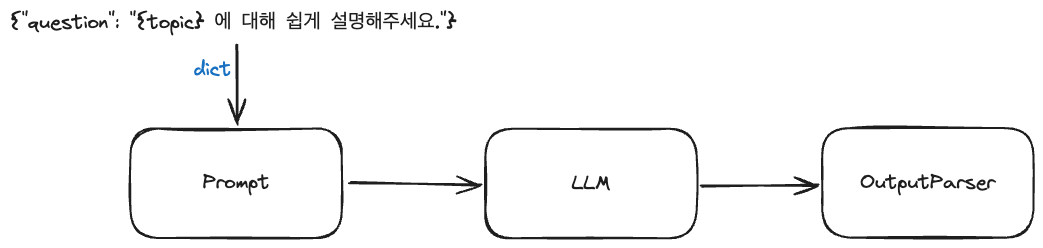

In [29]:
# [포인트] PromptTemplate은 '프롬프트(질문)'의 형식을 미리 정해놓는 템플릿입니다.
# 템플릿 안의 {topic} 자리에 우리가 원하는 주제를 넣으면 자동으로 질문 문장이 완성됩니다.
# 예시: topic이 '축구'면 → "축구 에 대해 쉽게 설명해주세요."라는 문장이 만들어짐.
prompt = PromptTemplate.from_template("{topic} 에 대해 쉽게 설명해주세요.")
# [포인트] ChatOpenAI는 실제로 GPT 모델(GPT-3.5 또는 GPT-4 등)을 불러와 사용하는 LangChain 객체입니다.
# 별도의 설정 없이도 기본값으로 모델을 사용할 수 있게 해줍니다.
model = ChatOpenAI()

# [포인트] LCEL 문법을 사용해 prompt → model 순으로 연결합니다.
# LCEL(LangChain Expression Language)은 파이프(|) 기호를 써서 여러 컴포넌트를 순차적으로 연결하는 방식입니다.
# 즉, '프롬프트로 문장 만들기 → 모델에 전달 → 응답 받기' 흐름을 한 줄로 표현할 수 있습니다.
chain = prompt | model

In [30]:
# [포인트] 실제 사용자 입력을 딕셔너리 형식으로 준비합니다.
# 'topic' 키는 위 프롬프트 템플릿의 {topic}에 들어갈 값을 의미합니다.
input = {"topic": "축구"}
# [포인트] chain.invoke()는 LCEL 체인을 실행하는 함수입니다.
# 아래와 같은 과정을 자동으로 처리합니다:
# 1. prompt에 '축구'가 들어가서 → "축구 에 대해 쉽게 설명해주세요." 문장이 생성됨
# 2. 이 문장이 GPT 모델에게 전달됨
# 3. 모델의 응답을 받아 최종 결과로 출력됨
chain.invoke(input)

AIMessage(content='축구는 두 팀이 경기장에서 공을 발로 차서 상대팀의 골대에 넣어 점수를 얻는 스포츠입니다. 각 팀은 골을 막기 위해 골키퍼를 두고, 경기는 일정 시간 동안 진행됩니다. 공을 차는 것과 상대편 골대로 넣어 득점하는 것이 주요 목표이며, 팀워크와 전략이 중요한 게임입니다. 각 팀은 11명의 선수로 이루어져 있고, 경기는 주로 90분 동안 진행되지만 추가 시간이 붙기도 합니다. 더 많은 골을 넣은 팀이 승리하게 됩니다.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 220, 'prompt_tokens': 22, 'total_tokens': 242, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--d7944e67-2c9d-43f2-bc25-9bcf893b501b-0')

In [31]:
# 🔄 위 내용 반복: 동일한 구조로 다시 prompt → model → chain 구성
# (의도적으로 반복 작성된 부분이니 강의에서는 생략하거나 복습 개념으로 짚어주면 좋습니다)
prompt = PromptTemplate.from_template("{topic} 에 대해 쉽게 설명해주세요.")
model = ChatOpenAI()
chain = prompt | model
input = {"topic": "축구"}
chain.invoke(input)

AIMessage(content='축구는 두 팀이 경기장에서 공을 발로 차서 상대팀의 골망에 넣어 득점을 하는 스포츠입니다. 각 팀은 골키퍼를 포함해 11명의 선수로 구성되어 있으며, 경기는 90분 동안 진행됩니다. 목표는 경기 종료 시에 더 많은 골을 넣어 상대팀보다 승리하는 것입니다. 축구는 전 세계적으로 인기 있는 스포츠로 많은 팬들이 경기를 관람하고 선수들의 활약을 응원합니다.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 22, 'total_tokens': 210, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--a6dc952d-6198-4d87-865e-f485491368f2-0')

# LCEL이 없는 경우

In [32]:
# ▶ openai 라이브러리를 직접 사용한 방식 (LangChain 없이 직접 API 호출)
from typing import List
import openai

# [포인트] 프롬프트 문장을 직접 문자열로 작성합니다.
prompt_template = "{topic}에 대해 설명해주세요"

# OpenAI 클라이언트 객체 생성 (주의: 실제 API 키가 필요함)
client = openai.OpenAI()

# [포인트] chat 모델을 직접 호출하는 함수 정의
# messages는 GPT 모델에게 전달되는 채팅 형식의 입력이며, 반드시 role과 content가 있어야 합니다.
def call_chat_model(messages: List[dict]) -> str:
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # 사용할 모델명
        messages=messages,      # 사용자 질문 리스트 전달
    )
    return response.choices[0].message.content  # 모델 응답 중 첫 번째 메시지 추출

# [포인트] 프롬프트에 topic을 넣어서 완성한 후 GPT 모델에게 전달하고 응답을 받는 전체 흐름을 처리합니다.
def invoke_chain(topic: str) -> str:
    prompt_value = prompt_template.format(topic=topic)  # 예: "ice cream에 대해 설명해주세요"
    messages = [{"role": "user", "content": prompt_value}]  # 사용자 역할로 메시지 구성
    return call_chat_model(messages)

# 함수 호출: 'ice cream'이라는 주제를 GPT에게 설명해달라고 요청함
invoke_chain("ice cream")

'아이스크림은 주로 디저트로 먹는 얼음과 우유를 주 원료로 만든 음식입니다. 주로 새우고 식당에서, 가정에서 또는 아이스크림 가게에서 즐기실 수 있습니다. \n\n아이스크림은 다양한 맛과 텍스처로 제공되며, 초콜릿, 바닐라, 딸기, 크림, 초코칩, 마카다미아너트 등 다양한 플레이버를 갖추고 있습니다. 또한 아이스크림 콘, 아이스크림 케이크, 아이스크림 샌드위치와 같이 다양한 형태로 제공되기도 합니다.\n\n아이스크림은 여름철에는 시원하고 상큼한 맛을 낼 뿐만 아니라, 겨울에도 따뜻한 컵에 담아 따뜻한 음료나 과자와 함께 즐기기도 합니다. 그리고 아이스크림은 달콤하고 부드러운 맛으로 사랑받는 디저트로 널리 알려져 있습니다.'

# LCEL을 사용한 경우

In [33]:
# ▶ LangChain의 고급 구성: 프롬프트 + 모델 + 출력 파서까지 체이닝
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# [포인트] ChatPromptTemplate: 대화형 GPT에게 적합한 프롬프트 생성 방식
prompt = ChatPromptTemplate.from_template("{topic}에 대해 설명해주세요")

# GPT 모델 설정
model = ChatOpenAI(model="gpt-3.5-turbo")

# [포인트] StrOutputParser: 모델의 응답을 문자열 형태로 파싱해주는 도구입니다.
output_parser = StrOutputParser()

# [포인트] 전체 체인을 구성합니다.
# 입력받은 문자열을 topic에 넣고 → 프롬프트 생성 → 모델 실행 → 결과 파싱까지 한 줄로 연결
chain = (
    {"topic": RunnablePassthrough()}  # 입력값 그대로 전달
    | prompt                          # 프롬프트에 topic 삽입
    | model                           # 모델에 전달
    | output_parser                   # 문자열로 결과 추출
)

# 'ice cream'이라는 입력으로 전체 체인 실행
chain.invoke("ice cream")

'아이스크림은 주로 디저트로 즐기는 음식으로, 주로 냉동 디저트로 만들어진다. 주로 우유나 크림, 설탕, 과일 등의 재료를 섞어 만들고, 그 후 냉동하여 굳혀 만든다. 다양한 맛이 있어 초콜릿, 바닐라, 딸기, 초콜릿칩 등이 있고, 종류도 매우 다양하다. 아이스크림은 뜨거운 날씨에는 시원하게 즐기거나, 디저트로도 즐길 수 있어 매우 인기 있는 음식이다.'

## 프롬프트 prompt + 언어모델 model + 출력파서 output parser

In [34]:
# ▶ 좀 더 특화된 프롬프트 예시: 역할 지시와 질문이 포함됨
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# [포인트] 프롬프트에 역할(role)을 명확히 지정: "당신은 천문학 전문가입니다"
prompt = ChatPromptTemplate.from_template("You are an expert in astronomy. Answer the question. : {input}")

# GPT 모델 호출 준비
llm = ChatOpenAI(model="gpt-3.5-turbo-0125")
output_parser = StrOutputParser()

# LCEL 체인 구성
chain = prompt | llm | output_parser

# [포인트] 사용자의 질문을 넣고 체인 실행
chain.invoke({"input": "지구의 자전 주기는?"})

'지구의 자전 주기는 약 24시간입니다. 이것은 하루 동안 지구가 자전하는 시간을 의미합니다. 지구가 자전하는 동안 태양은 동쪽에서 서쪽으로 움직이는 것처럼 보이는데, 이것이 하루가 지나는 이유입니다.'

## 고급(Multiple chain)

In [35]:
# ▶ 연속 체이닝: 첫 번째 체인의 결과를 두 번째 체인의 입력으로 사용

# [포인트] 첫 번째 프롬프트 템플릿을 정의합니다.
# {korean_word} 자리에 단어를 넣으면 그 단어와 관련된 30자 분량의 짧은 시나리오를 생성하도록 요청합니다.
# 예: korean_word가 "미래"라면 → "미래와 관련된 30자 시나리오를 써라"라는 문장이 생성됨
prompt1 = ChatPromptTemplate.from_template("아래 단어와 관련해서 30자 시나리오를 써라 {korean_word}")

# 사용할 GPT 모델을 지정합니다. 여기서는 gpt-3.5-turbo-0125를 사용합니다.
llm = ChatOpenAI(model="gpt-3.5-turbo-0125")

# [포인트] 첫 번째 체인(chain1)을 구성합니다.
# 입력된 korean_word를 기반으로 프롬프트 문장을 만들고 → GPT 모델에 전달한 뒤 → 결과를 문자열로 출력합니다.
chain1 = prompt1 | llm | StrOutputParser()

# [예시] korean_word에 '미래'를 입력합니다.
# 결과적으로 GPT는 "미래와 관련된 30자 시나리오"를 생성하게 됩니다.
chain1.invoke({"korean_word":"미래"})

'2035년, 지구는 인간이 멸종한 지 오래되어 자연이 인간의 유물들을 덮어가고 있다. 그런데 갑자기 우주선이 지구에 착륙한다. 외계인들이 존재하고 있었던 것이다. 인류는 미래로의 새로운 길을 열기 시작한다.'

In [36]:
# [포인트] 두 번째 프롬프트 템플릿을 정의합니다.
# {english_word} 자리에 문장을 넣으면, 그 문장에서 주요 키워드 3개를 뽑아달라는 요청이 됩니다.
# 예: "로봇이 지배하는 세상에서..." → 키워드: "로봇", "지배", "세상"
prompt2 = ChatPromptTemplate.from_template(
    "아래 내용에서 주요 키워드3개를 추출하라 {english_word}"
)

# [핵심 구조] 두 번째 체인(chain2)을 구성합니다.
# chain1의 출력값이 자동으로 {english_word} 자리에 들어갑니다.
# 즉, ① "미래" → 시나리오 생성 → ② 생성된 시나리오 → 키워드 3개 추출 순서로 흐름이 이어집니다.
chain2 = (
    {"english_word": chain1}  # chain1의 출력이 prompt2의 입력으로 자동 전달됨
    | prompt2                 # 두 번째 프롬프트로 문장 구성
    | llm                     # 모델에 전달
    | StrOutputParser()       # 결과를 문자열로 파싱
)

# [포인트] chain2.invoke()를 호출할 때는 korean_word만 입력합니다.
# 내부적으로는 다음과 같은 연쇄 작업이 이뤄집니다:
# 1. '미래' → chain1이 시나리오 생성
# 2. 생성된 시나리오 → chain2가 주요 키워드 3개 추출
# [결과] chain2는 최종적으로 키워드 리스트를 출력합니다.
chain2.invoke({"korean_word":"미래"})

'2030년, 로봇, 인간, 인공지능'

In [82]:
## 연습
prompt1 = ChatPromptTemplate.from_template("아래 단어와 관련해서 100자 시나리오를 써라 {korean_word}")
llm = ChatOpenAI(model="gpt-3.5-turbo-0125")
chain1.invoke({"korean_word":"비트코인의 미래"})
prompt2 = ChatPromptTemplate.from_template(
    "아래 내용에서 주요 키워드5개를 추출하라 {english_word}"
)
chain2 = (
    {"english_word": chain1}  # chain1의 출력이 prompt2의 입력으로 자동 전달됨
    | prompt2                 # 두 번째 프롬프트로 문장 구성
    | llm                     # 모델에 전달
    | StrOutputParser()       # 결과를 문자열로 파싱
)
chain2.invoke({"korean_word":"비트코인의 미래"})


'1. 2035년\n2. 비트코인\n3. 블록체인\n4. 금융 시스템\n5. 혁신적 변화'

## LangChain을 이용한 실시간 응답처리(Streaming)


In [37]:
# langchain과 OpenAI 라이브러리를 사용하여 실시간으로 질문에 답변할 수 있는 챗봇을 구현합니다.
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler  # 실시간 출력을 처리하는 모듈을 가져옵니다.
from langchain.chat_models import ChatOpenAI  # OpenAI 기반의 챗봇 모델을 사용하기 위한 모듈을 가져옵니다.
from langchain.schema import HumanMessage  # 사용자 메시지를 정의하는 데 사용하는 클래스를 가져옵니다.

# 챗봇을 설정합니다. 여기서는 OpenAI의 GPT 모델을 사용하며, 실시간으로 대화를 스트리밍합니다.
chat = ChatOpenAI(
    streaming=True,  # 'streaming'을 True로 설정해 실시간으로 대화의 결과를 받아볼 수 있습니다.
    callbacks=[
        StreamingStdOutCallbackHandler()  # 실시간으로 결과를 콘솔에 출력할 수 있도록 콜백 핸들러를 추가합니다.
    ])
# 챗봇에게 질문을 보내고 답변을 받습니다.
resp = chat([
    HumanMessage(content="축구 잘하는 법을 알려주세요")  # 사용자의 질문을 정의합니다.
])
# 위 코드는 사용자의 질문에 대한 답변을 실시간으로 콘솔에 출력합니다.


<ipython-input-37-684fc57e0f23>:13: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  resp = chat([


축구를 잘하기 위해서는 몇 가지 요령을 따라야 합니다. 아래는 축구를 잘하기 위한 팁들입니다:

1. 기본기를 탄탄히 다지세요: 패스, 드리블, 슈팅, 수비 등 기본적인 축구 기술을 충분히 연습하고 익히세요.

2. 체력을 키우세요: 축구는 높은 체력을 요구하는 스포츠이므로 꾸준한 유산소 운동을 통해 체력을 키우세요.

3. 팀워크를 중요시하세요: 축구는 팀 스포츠이기 때문에 팀원들과의 소통과 협력이 중요합니다. 훈련 중에도 팀원들과 소통하고 함께 훈련하세요.

4. 전술을 익히세요: 경기 중에 상황에 맞는 전략을 수립하고 실행하는 것이 중요합니다. 전략을 익히고 훈련하여 경기 중에 효과적으로 활용하세요.

5. 결단력을 갖추세요: 축구는 빠른 판단과 결단력이 필요한 스포츠이므로 자신의 판단에 확신을 갖고 행동하세요.

6. 훈련에 힘쓰세요: 축구를 잘하기 위해서는 지속적인 훈련이 필요합니다. 꾸준히 훈련하고 발전하는 자세를 갖추세요.

이러한 요령을 따르면 축구를 더욱 잘할 수 있을 것입니다. 특히 기본기를 탄탄히 다지고 팀워크를 중요시하는 것이 중요합니다. 축구를 즐기면서 노력하면 더욱 잘할 수 있을 것입니다.

In [38]:
##비교 예시(스트리밍이 없는 경우)

from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage

chat = ChatOpenAI()

resp = chat([
    HumanMessage(content="축구 잘하는 법을 알려주세요")
])

print(resp)

content='축구를 잘하기 위해서는 몇 가지 중요한 요소가 있습니다. 아래는 축구를 잘하기 위한 팁들입니다:\n\n1. 기본기를 탄탄하게 다지세요: 축구를 잘하기 위해서는 기본기가 중요합니다. 드리블, 패스, 슈팅, 수비 등의 기본기를 탄탄하게 다지는 것이 중요합니다.\n\n2. 체력을 키우세요: 축구는 고강도의 육체 활동이 요구되므로 좋은 체력이 필요합니다. 꾸준한 유산소 운동과 근력 운동을 통해 체력을 키워주세요.\n\n3. 팀워크를 강화하세요: 축구는 팀 스포츠이기 때문에 팀원들과의 소통과 협동이 중요합니다. 팀원들과의 원활한 커뮤니케이션과 협동을 강화하세요.\n\n4. 전략을 세우세요: 축구는 전략적인 게임이기 때문에 전략을 잘 세우는 것이 중요합니다. 상대팀을 분석하고 전략을 세워 경기에 임하세요.\n\n5. 꾸준한 연습이 필요합니다: 축구를 잘하기 위해서는 꾸준한 연습이 필요합니다. 매일 조금씩이라도 연습을 하고 기본기를 탄탄하게 다지세요.\n\n이러한 팁들을 참고하여 축구를 잘하실 수 있을 것입니다. 특히, 꾸준한 노력과 열정이 중요합니다. 축구를 사랑하고 열정을 가지고 노력하면 분명히 성과를 얻을 수 있을 것입니다.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 509, 'prompt_tokens': 21, 'total_tokens': 530, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop'

# 메모리(기억)

In [39]:
# ! pip install openai
# ! pip install langchain
# ! pip install -U langchain-community

### ChatMessageHistory


# 🤖 GPT 대화 기억 방식 비교: ChatMessageHistory vs ConversationChain

GPT는 기본적으로 **기억력이 없습니다.**  
하지만 LangChain을 사용하면 GPT가 **이전 대화를 기억**하게 만들 수 있습니다.  
이때 사용하는 대표적인 두 가지 도구가 바로 `ChatMessageHistory`와 `ConversationChain`입니다.

---

## 🔹 1. ChatMessageHistory: 수동 대화 저장 방식

### 📌 개념
- GPT와 나눈 대화를 **직접 저장**해주는 "대화 일기장"입니다.
- 이전 대화를 하나하나 수동으로 기록하며, 이를 바탕으로 문맥을 인식시킵니다.

✅ 특징
메시지를 직접 입력해서 저장

사용자가 어떤 메시지를 남길지 선택과 제어가 가능

복잡한 대화 흐름, 조건 분기, 커스터마이징에 유리

단점: 자동으로 저장되지 않음 → 직접 추가해야 함



##  2. ConversationChain: 자동 대화 흐름 관리

📌 개념
대화 내용을 LangChain이 자동으로 기억하면서 문맥 기반 응답을 만들어주는 도구입니다.

predict() 함수로 입력만 하면, 이전 대화까지 알아서 저장하고 이어서 대답합니다.

✅ 특징
사용자의 입력과 GPT의 응답이 자동으로 메모리에 저장

빠르게 챗봇을 만들거나 테스트할 때 유용

단점: 내부 흐름이 자동이라, 세부 제어가 어려움

📊 두 방식 비교 요약
항목	ChatMessageHistory	ConversationChain
🎯 목적	수동 메시지 기록	자동 대화 기억 관리
🧠 기억 방식	사용자가 직접 입력	자동 저장
🔧 제어력	높음 (직접 조작 가능)	낮음 (자동 처리됨)
🧰 사용 시점	복잡한 커스터마이징, 조건 분기	간단한 챗봇, 테스트, 데모
📦 메시지 추가	add_user_message() 등 명시적 입력	predict()만 사용하면 자동 처리

🎯 정리



ChatMessageHistory는 GPT와의 대화를 사용자가 직접 저장하고 관리하는 방식입니다.
→ 섬세한 제어가 필요한 상황에 적합합니다.



ConversationChain은 LangChain이 자동으로 대화를 기억하고 이어주는 도구입니다.
→ 빠르게 챗봇을 만들고 싶을 때, 간단한 흐름을 다룰 때 적합합니다.


In [40]:
from langchain.memory import ChatMessageHistory
from langchain.chat_models import ChatOpenAI

# [포인트] ChatOpenAI는 GPT 모델을 사용하기 위한 인터페이스입니다.
# 이 객체를 통해 GPT에게 질문을 보내고 응답을 받을 수 있습니다.
chat = ChatOpenAI()

# [포인트] ChatMessageHistory는 '대화 기록'을 저장하는 메모리 객체입니다.
# GPT와의 이전 대화들을 기억하게 하려면, 이 객체를 활용해야 합니다.
# 여기 저장된 메시지들이 GPT 모델에 함께 전달되어, 문맥을 이해하게 도와줍니다.
history = ChatMessageHistory()

# [포인트] AI가 먼저 인사하는 메시지를 추가합니다.
# 역할: 'AI'로 메시지를 남기며, 초기 대화의 시작을 만듭니다.
history.add_ai_message("안녕하세요!")

# [포인트] 사용자가 질문한 내용을 기록합니다.
# 이번엔 프랑스의 수도에 대한 질문을 추가했습니다.
history.add_user_message("프랑스의 수도는 어디인가요?")

# [포인트] AI가 사용자 질문에 답변한 내용을 기록합니다.
# 예시 응답: "프랑스의 수도는 파리입니다."
history.add_ai_message("프랑스의 수도는 파리입니다.")

# [포인트] 지금까지 누적된 대화 내용을 출력해봅니다.
# ChatMessageHistory 객체에는 지금까지 오간 메시지들이 차곡차곡 쌓여있습니다.
print("현재 대화 내역:", history)


현재 대화 내역: AI: 안녕하세요!
Human: 프랑스의 수도는 어디인가요?
AI: 프랑스의 수도는 파리입니다.


In [41]:
# [포인트] 사용자가 새로운 질문을 합니다.
# 질문 내용: 앞에서 이야기한 수도가 무엇이었는지 다시 확인 요청
# 중요한 점은 이 질문이 앞선 대화 맥락을 기반으로 하고 있다는 것입니다.
new_question = "앞의 대화에서 말한 수도를 다시 한번 말해주세요."
history.add_user_message(new_question)

# [포인트] 지금까지 누적된 메시지들(history.messages)을 기반으로 GPT에게 질문을 보냅니다.
# GPT는 지금까지의 대화 전체를 보고, 그 문맥을 바탕으로 새 질문에 답변하게 됩니다.
response = chat(history.messages)

# [포인트] GPT가 응답한 내용을 출력합니다.
# 앞의 대화 흐름을 인식했기 때문에, '파리입니다'와 같은 응답이 예상됩니다.
print(response.content)

프랑스의 수도는 파리입니다.


[링크 텍스트](https://)### ConversationChain

ConversationChain은 문맥 기억 기능이 자동 포함된 체인입니다.
→ 이전 입력을 따로 저장하거나 전달할 필요 없이, GPT가 흐름을 이어받아 응답할 수 있게 도와줍니다.

주요 특징 및 동작
ConversationChain 사용: 이 코드에서는 ConversationChain 클래스를 사용하여 대화를 관리합니다.
LLM 설정: ChatOpenAI 객체를 생성하고 ConversationChain에 전달하여 사용합니다.
predict 메소드 사용: predict 메소드를 사용하여 대화를 진행합니다. 입력된 내용을 기반으로 AI가 응답을 생성합니다.
Verbose 모드: verbose=True 설정으로 대화의 자세한 진행 과정을 출력합니다.

In [42]:
from langchain.chat_models import ChatOpenAI
from langchain import ConversationChain

# [포인트] ChatOpenAI: GPT-4 모델을 불러오기 위한 LangChain 객체입니다.
# temperature=0 → 창의성 없이 '사실 기반의 정확한 응답'을 원할 때 사용합니다.
# model_name='gpt-4' → 사용할 GPT 모델 버전 지정
llm = ChatOpenAI(
    temperature=0,
    model_name='gpt-4',
)

# [포인트] ConversationChain: GPT와의 대화를 기억하면서 이어가는 객체입니다.
# 내부적으로 '대화 기록 메모리'를 자동으로 관리해줍니다.
# verbose=True → 실행 로그를 자세히 출력하므로 디버깅이나 학습 시 매우 유용합니다.
conversation = ConversationChain(llm=llm, verbose=True)

# [1단계 입력] 사용자가 첫 번째 문장을 입력합니다.
# "진규는 사과가 3개를 가지고 있습니다." → 이 정보는 대화 기록에 저장됩니다.
conversation.predict(input="진규는 사과가 3개를 가지고 있습니다.")

# [2단계 입력] 두 번째 문장이 이어집니다.
# "영희는 배를 5개 가지고 있습니다." → 이 문장도 마찬가지로 기억됩니다.
conversation.predict(input="영희는 배를 5개 가지고 있습니다.")

# [3단계 질문] 이전 두 문장을 바탕으로 질문을 합니다.
# [포인트] ConversationChain은 앞서 입력된 내용을 기억하고 있으므로,
# "진규와 영희가 가지고 있는 과일수는?"이라는 질문에 대해
# → 3 + 5 = 8이라는 답을 도출할 수 있습니다.
conversation.predict(input="진규와 영희가 가지고 있는 과일수는?")




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: 진규는 사과가 3개를 가지고 있습니다.
AI:


<ipython-input-42-bff9abd7fb18>:15: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(llm=llm, verbose=True)
/usr/local/lib/python3.11/dist-packages/pydantic/main.py:253: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)



> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: 진규는 사과가 3개를 가지고 있습니다.
AI: 그렇군요, 진규 씨가 사과를 3개 가지고 있다는 것을 알게 되었습니다. 이 정보를 어떻게 활용하면 좋을까요?
Human: 영희는 배를 5개 가지고 있습니다.
AI:

> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: 진규는 사과가 3개를 가지고 있습니다.
AI: 그렇군요, 진규 씨가 사과를 3개 가지고 있다는 것을 알게 되었습니다. 이 정보를 어떻게 활용하면 좋을까요?
Human: 영희는 배를 5개 가지고 있습니다.
AI: 알겠습니다, 영희 씨는 배를 5개 가지고 있다는 정보를 기억하겠습니다. 이제 진규 씨와 영희 씨가 각각 어떤 과일을 얼

'진규 씨가 가지고 있는 사과는 3개이고, 영희 씨가 가지고 있는 배는 5개입니다. 따라서 진규와 영희가 가지고 있는 과일의 총 수는 8개입니다.'

## 🧠 LangChain 기억 기능 비교: `ChatMessageHistory` vs `ConversationChain`

| 항목                     | `ChatMessageHistory` 방식                           | `ConversationChain` 방식                        |
|--------------------------|----------------------------------------------------|------------------------------------------------|
| ✅ 대화 기록 방식         | 수동으로 AI/사용자 메시지를 직접 추가               | 자동으로 이전 대화가 내부적으로 저장됨         |
| ✅ 메시지 전달 방식       | `.messages`로 GPT에게 명시적으로 전달               | `predict(input=...)`만 호출하면 자동 전달됨     |
| ✅ 코드 제어 수준         | 높음 (디테일하게 기록 조작 가능)                   | 낮음 (직관적이지만 내부 메모리 설정 제한적)     |
| ✅ 사용 난이도            | 초보자에겐 약간 복잡                                | 매우 쉬움 (초보자에게 적합)                     |
| ✅ 적합한 상황            | 디버깅, 테스트, 커스터마이징, 대화 흐름 분석        | 간단한 챗봇 구현, 빠른 프로토타이핑              |
| ✅ 사용 예시 코드        | `history.add_user_message()`, `chat(history.messages)` | `conversation.predict(input="...")`             |

### 🔎 요약
- **정밀 제어가 필요할 땐** → `ChatMessageHistory`
- **빠르고 간단한 챗봇 만들 땐** → `ConversationChain`


# RunnablePassthrough

아래 코드는 GPT 모델에게 숫자를 입력하면 그 숫자의 10배를 계산해서 응답하도록 구성된 예제입니다. 먼저 "숫자의 10배는?"이라는 질문 형식을 만들고, 그 형식에 입력값을 채워 GPT에게 전달합니다. 여기서 핵심은 `RunnablePassthrough`라는 도구인데, 이걸 사용하면 숫자 하나만 전달해도 자동으로 딕셔너리 형태(예: {"num": 10})로 바꿔주는 역할을 합니다. 덕분에 코드를 더 간단하고 직관적으로 작성할 수 있습니다. 비유하자면, 첫 번째 코드는 사용자가 직접 서류를 써야 했다면, 이 코드는 숫자만 말하면 서류가 자동으로 작성되는 구조입니다.


### RunnablePassthrough사용하지 않는 경우

In [43]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# [포인트] PromptTemplate: GPT에게 질문할 문장의 '틀(template)'을 정의합니다.
# 여기서는 num이라는 변수를 받아서 "num의 10배는?"이라는 문장을 만들어냅니다.
prompt = PromptTemplate.from_template("{num}의 10배는?")

# [포인트] ChatOpenAI: GPT-4 또는 GPT-3.5 모델을 실제로 호출하는 객체입니다.
# temperature=0 → 창의성 없이 '정확하고 일관된 답변'을 원할 때 설정합니다.
llm = ChatOpenAI(temperature=0)

# [포인트] prompt | llm : 파이프(|) 연산자를 사용해 '프롬프트 → GPT' 순서로 연결된 체인을 만듭니다.
# 즉, 프롬프트에 값을 넣고 → GPT로 넘겨 → 답변을 받는 전체 과정이 chain으로 구성됩니다.
chain = prompt | llm



In [44]:

# [포인트] .invoke({...}): chain을 실행하여 실제 결과를 받아옵니다.
# 여기선 num=5를 전달 → "5의 10배는?" 생성 → GPT 응답
result = chain.invoke({"num": 5})
print(result.content)  # 출력 예상: "50입니다."

# num=10을 입력하여 같은 방식으로 체인 실행
result = chain.invoke({"num": 10})
print(result.content)  # 그런데 여기서도 "50입니다."가 반복된다면 → 프롬프트 사용 방식 점검 필요

# num=15 실행
result = chain.invoke({"num": 15})
print(result.content)  # 역시 같은 출력이 반복될 수 있음 → 아래 코드와 비교하면서 문제를 확인해봅니다.

50
100
150입니다.


### RunnablePassthrough사용하는 경우

In [45]:
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# [포인트] PromptTemplate: 앞과 동일하게 '문장 템플릿'을 정의합니다.
prompt = PromptTemplate.from_template("{num}의 10배는?")

# [포인트] LLM 정의: 실제 GPT 모델 연결
llm = ChatOpenAI(temperature=0)

# [포인트] RunnablePassthrough: 입력값을 그대로 전달해주는 '입력 전달자' 역할을 합니다.
# 여기서는 "10" 같은 단일 숫자를 받아, 그것을 {"num": 10} 형태의 딕셔너리로 만들어주는 효과를 줍니다.
# 예를 들어 invoke(10) → {"num": 10}으로 바꿔줍니다.

# [핵심 구조] runnable_chain = {"num": RunnablePassthrough()} | prompt | llm
# 1. 입력값을 {"num": 값} 형태로 가공
# 2. prompt로 전달 → "값의 10배는?" 문장 생성
# 3. llm(GPT)에게 질문 전달 → 응답 받기
runnable_chain = {"num": RunnablePassthrough()} | prompt | llm


In [46]:

# [포인트] invoke(10): 이제 단순 숫자 10만 넣어도 자동으로 {"num": 10} 처리됨
result = runnable_chain.invoke(10)
print(result.content)  # 출력 예상: "100입니다."

# 동일한 방식으로 숫자 15 입력
result = runnable_chain.invoke(15)
print(result.content)  # 출력: "150입니다."

# 20 입력
result = runnable_chain.invoke(20)
print(result.content)  # 출력: "200입니다."

# ✅ 정리:
# - 앞의 코드에서는 딕셔너리 형식으로 직접 {"num": 값}을 넣어줘야 했습니다.
# - 하지만 여기서는 RunnablePassthrough를 활용해 숫자만 넣으면 자동으로 키-값 형태로 바뀝니다.
# - 따라서 훨씬 직관적이고 깔끔하게 체인을 실행할 수 있습니다.

# 💡 비유로 설명하자면:
# 앞 코드는 "준비된 서류 양식에 값을 직접 써야 하는 방식"이라면,
# 여긴 "숫자만 말하면 알아서 서류를 만들어주는 방식"입니다.


100
150입니다.
200입니다.
